<a href="https://colab.research.google.com/github/MansiD7-ubey/AIMLMonth2023/blob/main/MAJOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MAJOR PROJECT**
##**CYBER SECURITY**
###*KEYSTROKE DATA ANALYSIS*

#**K Nearest Neighbour Model for User Authentication based on Keystroke Dynamics (KNN)**

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

###LOAD AND EXPLORE DATA

In [469]:
data = pd.read_csv("KeystrokeData.csv")
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [470]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

##DATA VISUALIZATION

###Split data into train and test data

In [471]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

<Axes: xlabel='Target', ylabel='count'>

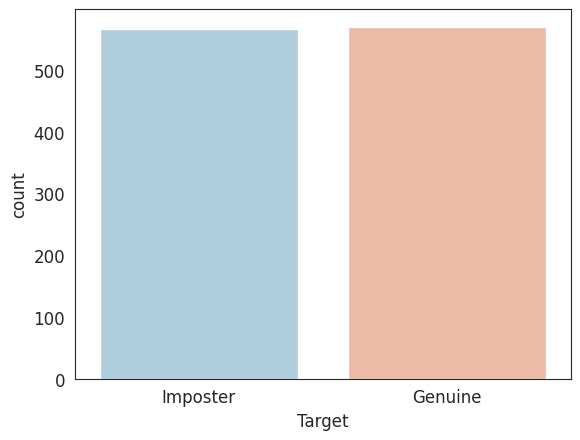

In [472]:
sns.countplot(x='Target',data=train,palette='RdBu_r')

###Train model with training data

In [473]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [474]:
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           #metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           #weights='uniform')

In [475]:
y_test.count()

285

In [476]:
#user1_data = np.array([[100, 50], [90, 60], [80, 55], [95, 58], [105, 53]])
#user2_data = np.array([[105, 55], [85, 62], [70, 52], [100, 57], [110, 60]])

# Labels for the data (0 for user1, 1 for user2)
#user1_labels = np.zeros(user1_data.shape[0])
#user2_labels = np.ones(user2_data.shape[0])

# Combine the data and labels for training
#X_train = np.vstack((user1_data, user2_data))
#y_train = np.hstack((user1_labels, user2_labels))

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [477]:
y_pred = knn_classifier.predict(X_test)


# Sample data for a new user for authentication
new_user_data = np.array([[95, 56], [110, 62], [85, 58], [92, 54], [105, 60]])



###Predict Results

[[173   4]
 [  2 163]]


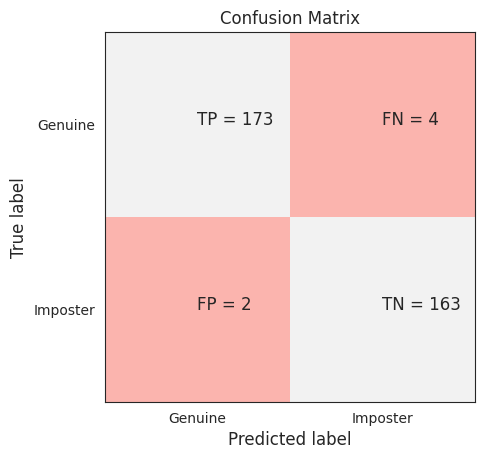

In [478]:
pred = knn.predict(X_test)
come = confusion_matrix(y_test,pred)
print(come)
sns.set_style('white')
plt.clf()
plt.imshow(come, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 12)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=10)
plt.yticks(tick_marks, classNames,fontsize=10)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(come[i][j]))
plt.show()

In [479]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.99      0.98      0.98       177
    Imposter       0.98      0.99      0.98       165

    accuracy                           0.98       342
   macro avg       0.98      0.98      0.98       342
weighted avg       0.98      0.98      0.98       342



In [480]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9824561403508771


In [481]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

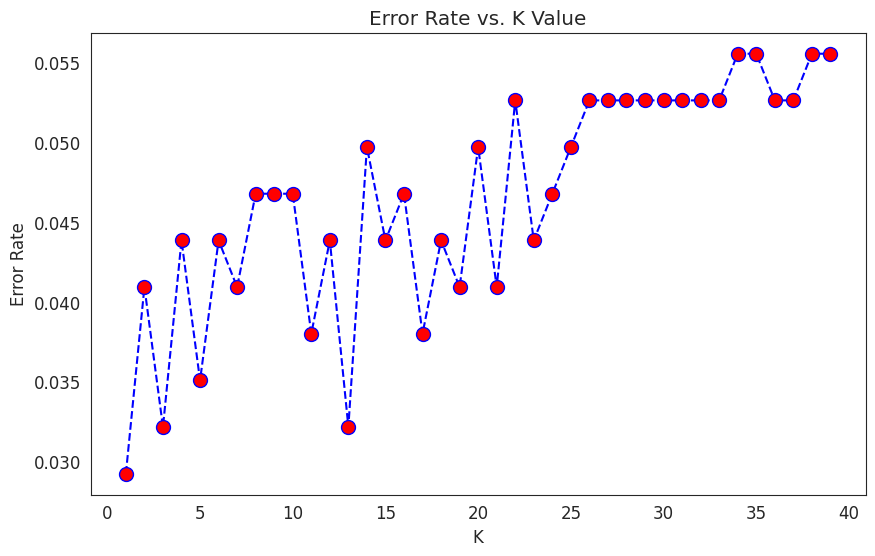

In [482]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [483]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
 [Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.060000000000000005, '0.06'),
  Text(0, 0.06999999999999999, '0.07')])

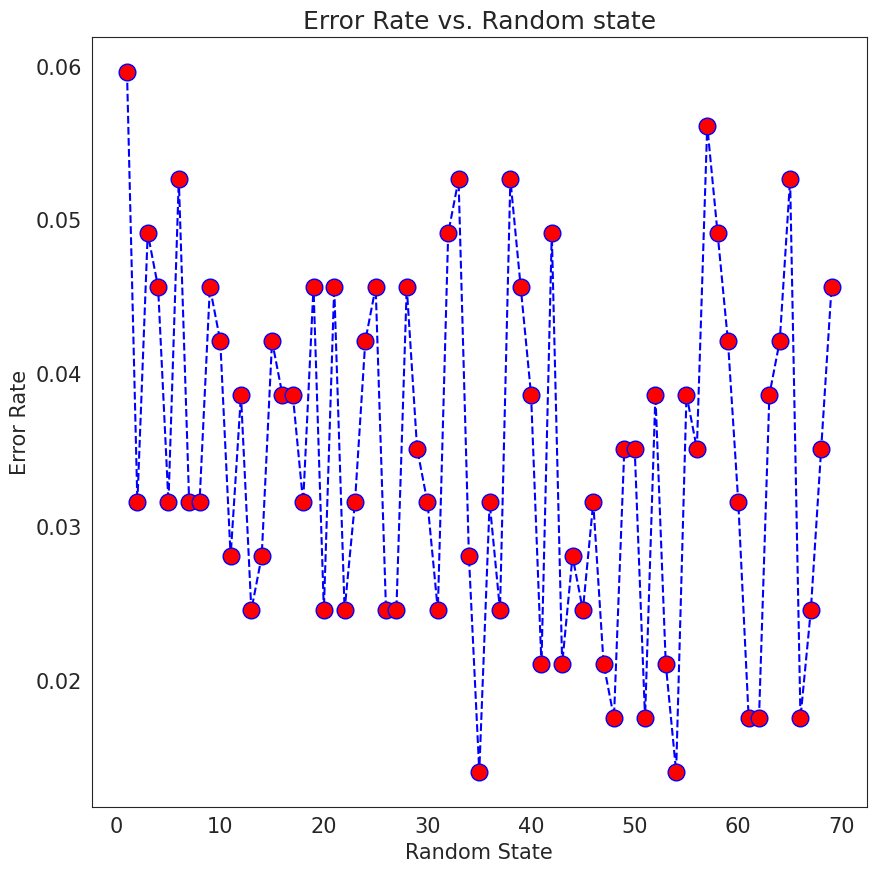

In [484]:
ax =plt.figure(figsize=(10,10))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=12,)
plt.title('Error Rate vs. Random state',fontsize=18)
plt.xlabel('Random State',fontsize=15)
plt.ylabel('Error Rate',fontsize=15)
# plt.axis([1,70,0.1,])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [485]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [486]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:

    train, test = train_test_split(data, test_size = i,random_state = 33)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

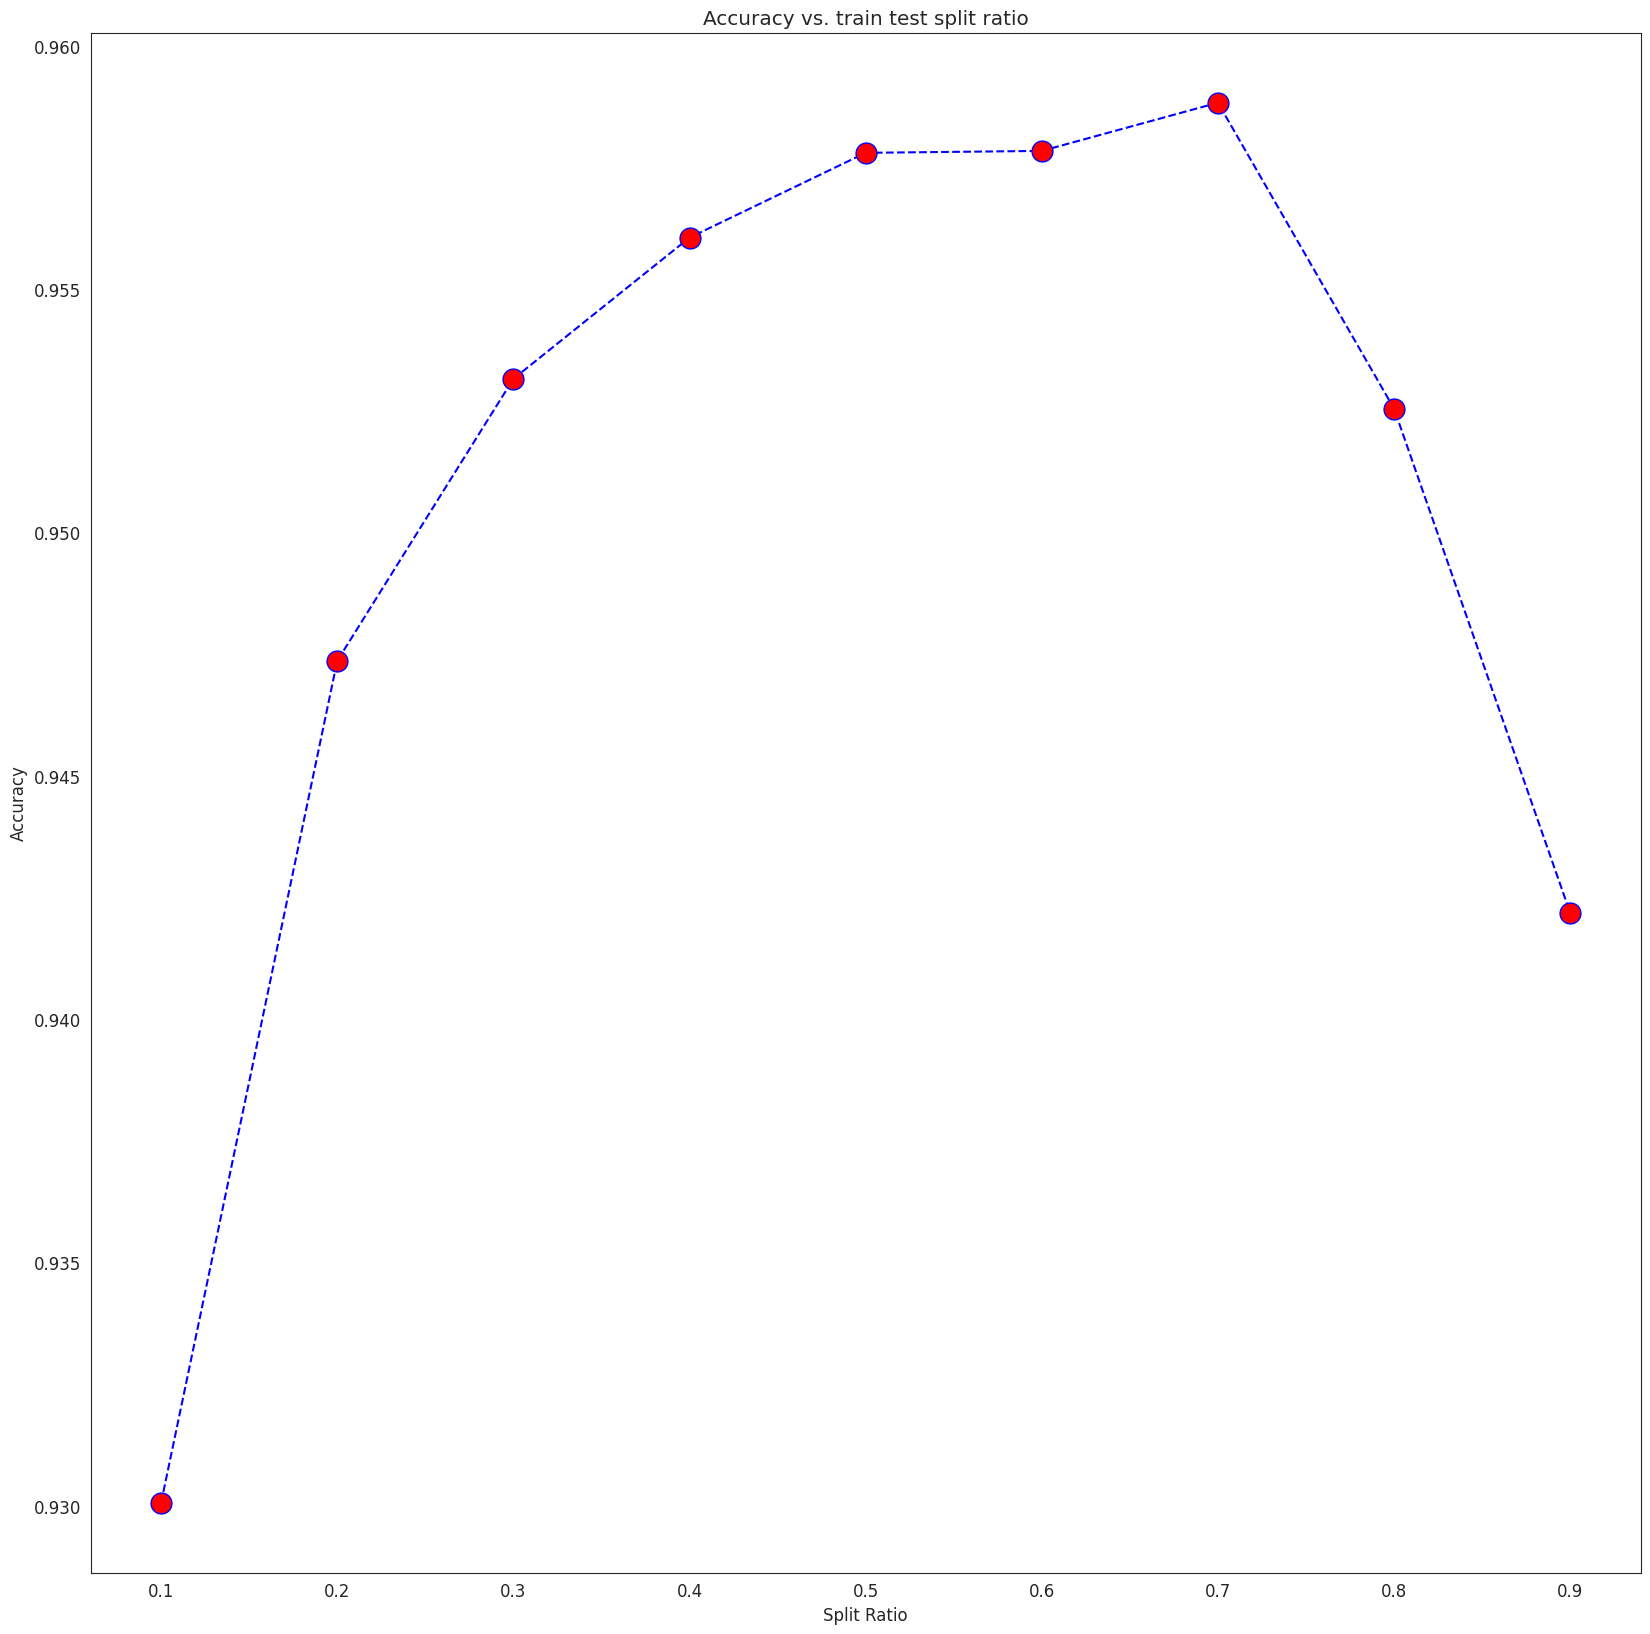

In [487]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

In [488]:
data = pd.read_csv("KeystrokeData.csv")
train, test = train_test_split(data, test_size = 0.2, random_state=33)
features = list(data.columns[1:32])


X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

[[135   7]
 [  8 135]]


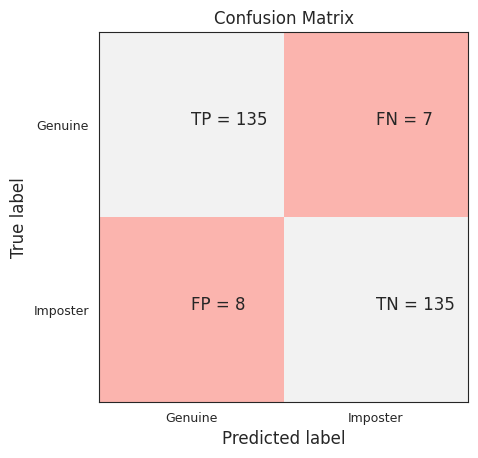

In [489]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 12)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=9)
plt.yticks(tick_marks, classNames,fontsize=9)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [490]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.94      0.95      0.95       142
    Imposter       0.95      0.94      0.95       143

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285



In [491]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9473684210526315


#**ANALYZING KEYSTROKE DATA USING NEURAL NETWORKS**

### Import required libraries

In [492]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


###Generate synthetic keystroke data

In [493]:
np.random.seed(42)

# Number of samples for each class
num_samples = 1000

# Generating genuine keystroke data
genuine_data = np.random.normal(loc=100, scale=20, size=(num_samples, 10))

# Generating impostor keystroke data
impostor_data = np.random.normal(loc=150, scale=30, size=(num_samples, 10))

# Creating labels for genuine (class 0) and impostor (class 1)
genuine_labels = np.zeros(num_samples)
impostor_labels = np.ones(num_samples)

# Combining the data and labels
data = np.vstack((genuine_data, impostor_data))
labels = np.hstack((genuine_labels, impostor_labels))


###Split the data into training and testing sets

In [494]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


###Build and train the neural network model

In [495]:
model = Sequential()

# Add input layer with 10 neurons (10 features) and a hidden layer with 8 neurons
model.add(Dense(8, input_dim=10, activation='relu'))

# Add output layer with 1 neuron and sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
45/45 [==============================] - 1s 5ms/step - loss: 67.4237 - accuracy: 0.5042 - val_loss: 24.2669 - val_accuracy: 0.4625
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 10.9790 - accuracy: 0.5063 - val_loss: 11.9603 - val_accuracy: 0.4500
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 9.3362 - accuracy: 0.4972 - val_loss: 11.8531 - val_accuracy: 0.4437
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 9.1075 - accuracy: 0.4965 - val_loss: 11.4731 - val_accuracy: 0.4437
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 8.7857 - accuracy: 0.5063 - val_loss: 10.8973 - val_accuracy: 0.4500
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 8.5350 - accuracy: 0.5035 - val_loss: 10.4680 - val_accuracy: 0.4625
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 8.1604 - accuracy: 0.5014 - val_loss: 10.1999 - val_accuracy: 0.4500
Epoch 8/50


### Evaluate the model

In [496]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print("Test accuracy:", accuracy)


13/13 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.5200
Test accuracy: 0.5199999809265137


#**Logistic Regression Model for User Authentication based on Keystroke Dynamics**

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

##Load Data

In [498]:
data = pd.read_csv("KeystrokeData.csv")

In [499]:
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [500]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

##Data Visualization

<Axes: xlabel='Target', ylabel='count'>

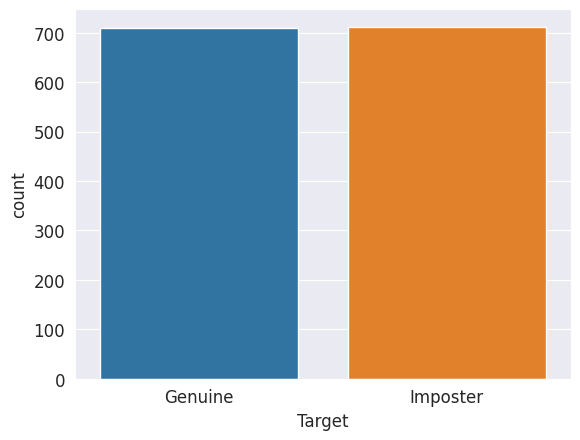

In [501]:
sns.set_style('darkgrid')
sns.countplot(x='Target',data=data)

##Split data into train and test data

In [502]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

##Create logistic regression model and train it with training data

In [503]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

##Predict results

In [504]:
pred = logmodel.predict(X_test)

In [505]:
df = pd.DataFrame(y_test)
se = pd.Series(pred)
df['Predictions'] = se.values
tempdf = pd.DataFrame(logmodel.predict_proba(X_test))
se1 = pd.Series(tempdf[0])
ew = se1.round(decimals=3)
df['Genuine probability'] = ew.values
se2 = pd.Series(tempdf[1])
ew1 = se2.round(decimals=3)
df['Imposter probability'] = ew1.values

In [506]:
df

,Target,Predictions,Genuine probability,Imposter probability
804,Imposter,Imposter,0.058,0.942
38,Genuine,Genuine,0.890,0.110
1252,Imposter,Imposter,0.115,0.885
1115,Imposter,Imposter,0.047,0.953
168,Genuine,Genuine,0.822,0.178
...,...,...,...,...
977,Imposter,Imposter,0.469,0.531
25,Genuine,Imposter,0.270,0.730
753,Imposter,Imposter,0.132,0.868
1376,Imposter,Imposter,0.101,0.899


##Check Performance of Model

In [507]:
model_accuracy = metrics.accuracy_score(y_test,pred)

In [508]:
y_test.value_counts()

Imposter    151
Genuine     134
Name: Target, dtype: int64

In [509]:
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[128   6]
 [ 10 141]]


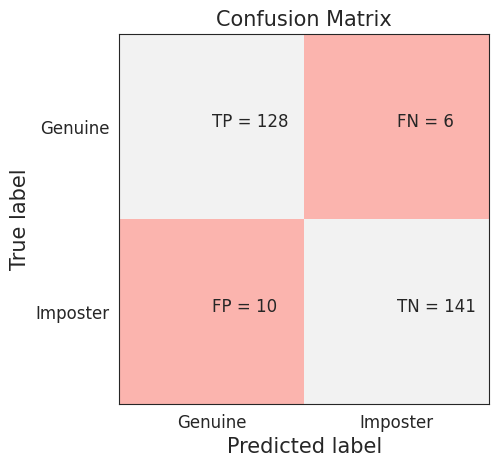

In [510]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

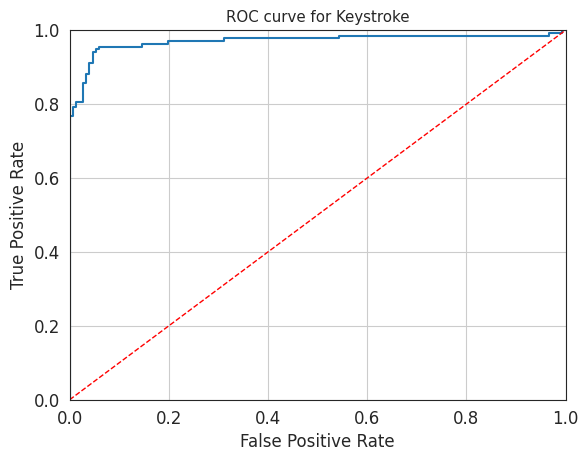

In [511]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)

In [512]:
print("Accuracy of Model is: ", model_accuracy*100)
print()
print("Mis-Classification Rate of Model is: ",(1-model_accuracy)*100)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  94.38596491228071

Mis-Classification Rate of Model is:  5.6140350877192935

Area Under Curve:  0.970544627854107


In [513]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.93      0.96      0.94       134
    Imposter       0.96      0.93      0.95       151

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



##Parameter Tuning

In [514]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression()

    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 [Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.07, '0.07'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.09000000000000001, '0.09'),
  Text(0, 0.1, '0.10')])

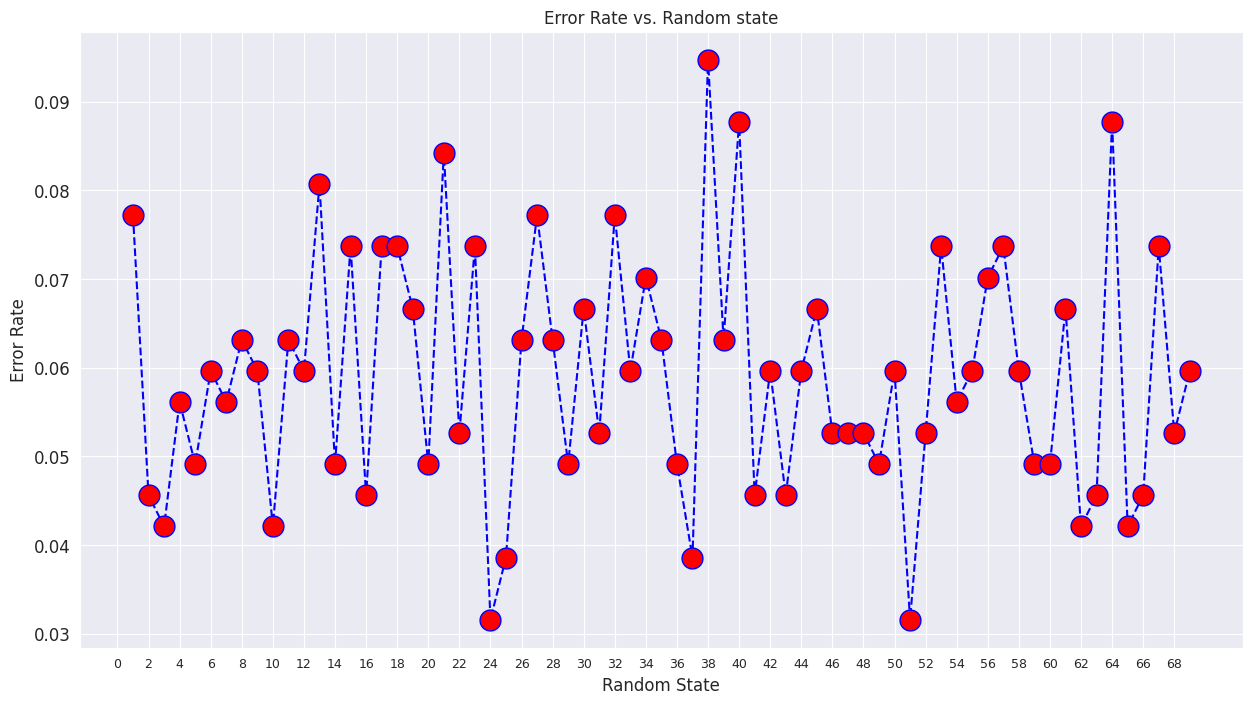

In [515]:
sns.set_style('darkgrid')

ax =plt.figure(figsize=(15,8)).add_subplot(1, 1, 1)
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15,)

plt.title('Error Rate vs. Random state',fontsize=12)
plt.xlabel('Random State',fontsize=12)
plt.ylabel('Error Rate',fontsize=12)
major_ticks = np.arange(0, 70, 2)
minor_ticks = np.arange(0, 70, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)

In [516]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
accuracy = []

for i in C_param_range:

    train, test = train_test_split(data, test_size = 0.2,random_state = 13)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=i)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Text(0, 0.5, 'Accuracy')

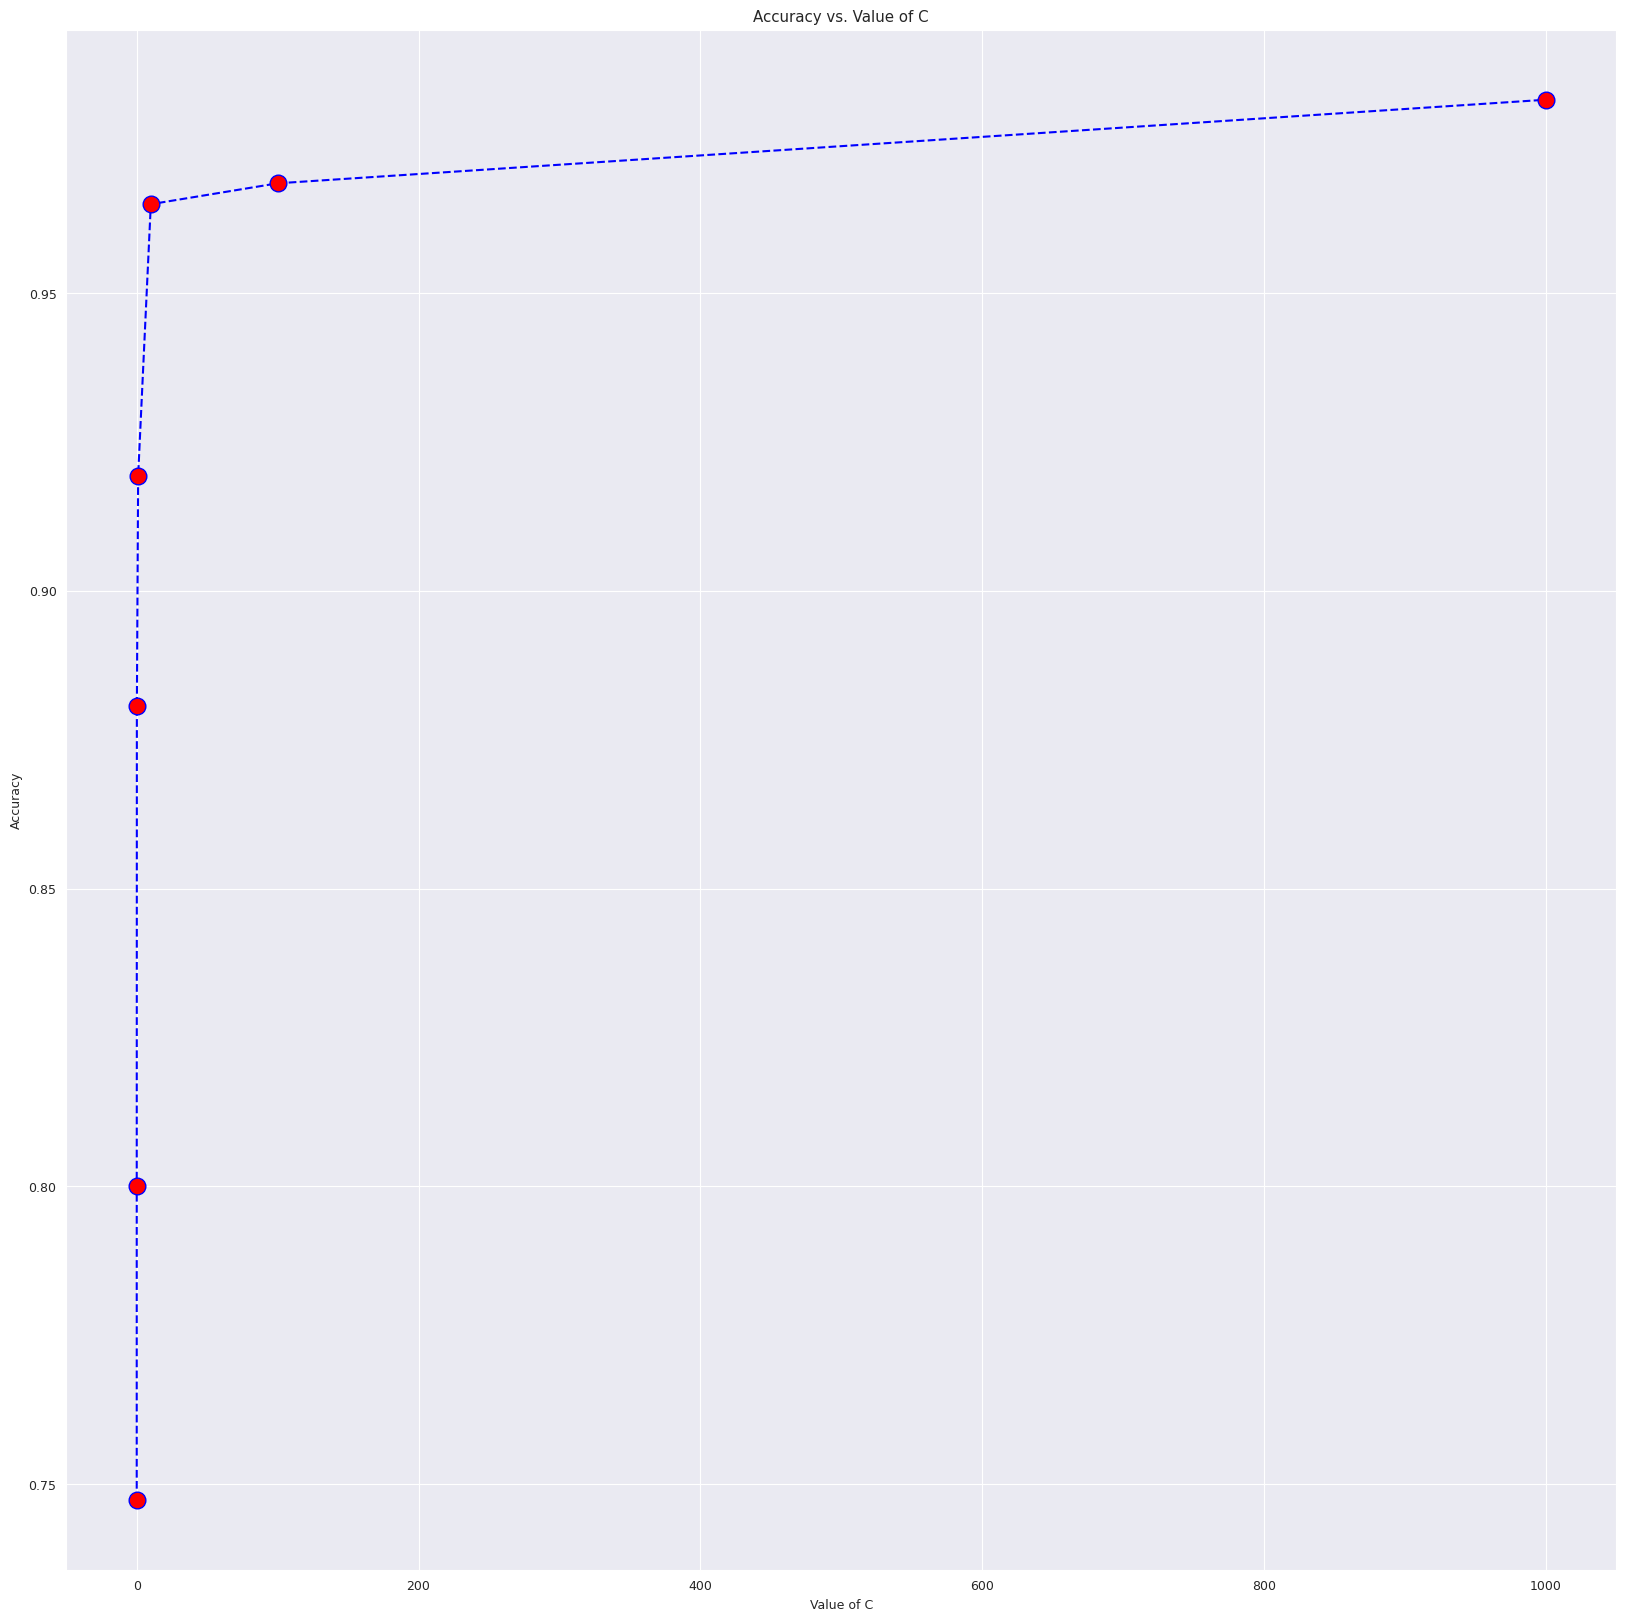

In [517]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_param_range,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Accuracy vs. Value of C')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

In [518]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:

    train, test = train_test_split(data, test_size = i,random_state = 13)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=100)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Text(0, 0.5, 'Accuracy')

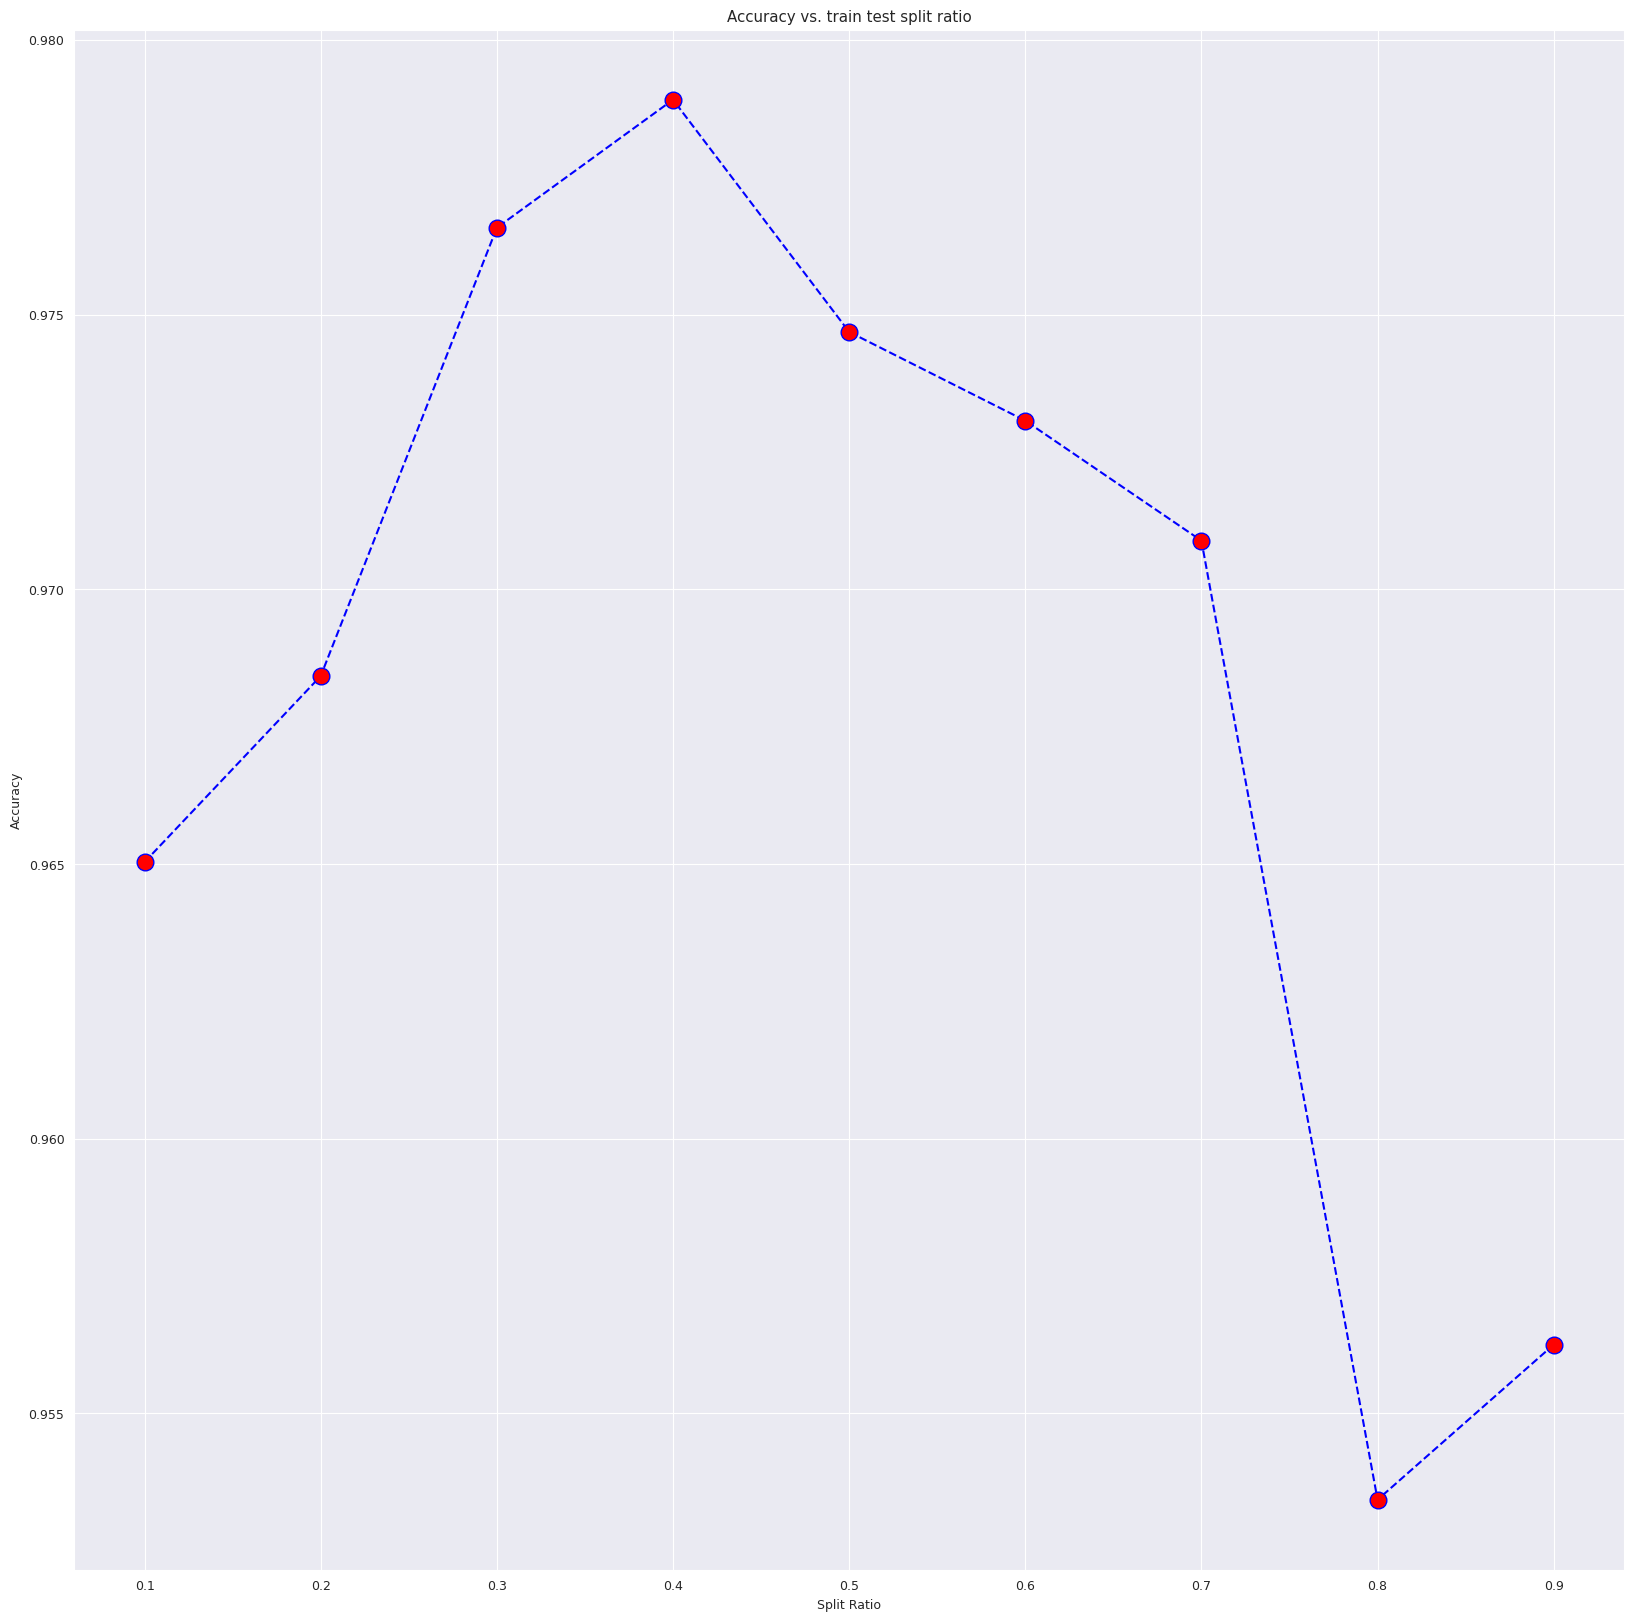

In [519]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

##Performance of model after parameter tuning.

In [520]:
train, test = train_test_split(data, test_size = 0.2, random_state= 24)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
logmodel = LogisticRegression(C=100)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[143   0]
 [  2 140]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


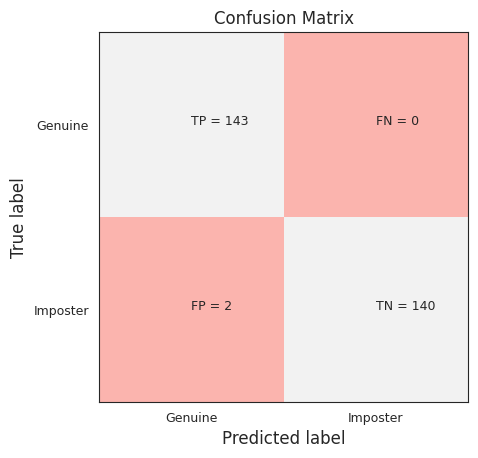

In [521]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 12)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=9)
plt.yticks(tick_marks, classNames,fontsize=9)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Area under curve:  0.9998522604156407


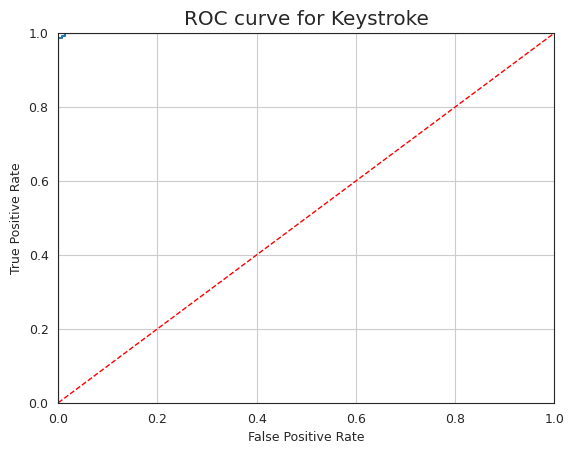

In [522]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)
print("Area under curve: " ,roc_auc)

In [523]:
print("Accuracy of Model is: ",model_accuracy)
print()
print("Mis-Classification Rate of Model is: ",1 - model_accuracy)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  0.9929824561403509

Mis-Classification Rate of Model is:  0.007017543859649145

Area Under Curve:  0.9998522604156407


In [524]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.99      1.00      0.99       143
    Imposter       1.00      0.99      0.99       142

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285

